In [1]:
%reload_ext autoreload
%autoreload 2

# import sys
import dill
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
colors = [(0,0,0), (1,0.5,0), (1,0,0), (0,0,1)]
cmap = mcolors.ListedColormap(colors)

# numpy.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold= np.inf)

from Grid import Grid, Point
from Engine import Engine
import initial_states
from utils import EngineStatistics

init_config1 = {'stalk_cells': initial_states.initial_grid1_stalks,
                'attractor_cells': initial_states.initial_grid1_attractors}
init_config2 = {'stalk_cells': initial_states.initial_grid2_stalks,
                'attractor_cells': initial_states.initial_grid2_attractors}
init_config3 = {'stalk_cells': initial_states.initial_grid3_stalks,
                'attractor_cells': initial_states.initial_grid1_attractors}
 
grid1 = Grid(width=60, height=60, init_config=init_config1)
grid2 = Grid(width=60, height=60, init_config=init_config2)
grid3 = Grid(width=60, height=60, init_config=init_config3)


ImportError: cannot import name 'Grid' from partially initialized module 'Grid' (most likely due to a circular import) (/home/mayar_win/CompBio/cb-final-project/Grid.py)

In [ ]:
# generations0 = 1
# engine0 = Engine(init_grid=grid1, generations=generations0)
# engine0.run()
# engine0.visualize()
# import matplotlib.pyplot as plt
# grid1.visualize_potential_matrix()

In [ ]:
def vis_stats_cells(stats: EngineStatistics):
    stats_cells = stats.num_cell_history
    stats_tips = stats.num_tip_history
    stats_stalks = stats.num_stalk_history
    
    # Make a data frame
    df=pd.DataFrame({'Generations': range(0,stats.generations), 'Cells': stats_cells, 'Tips': stats_tips, 'Stalk': stats_stalks})
    # Change the style of plot
    plt.style.use('seaborn-darkgrid')
    
    # Plot multiple lines
    num=0
    for column in df.drop('Generations', axis=1):
        plt.plot(df['Generations'], df[column], marker='', color=cmap(num), linewidth=1, alpha=0.9, label=column)
        num+=1

    # Add legend
    plt.legend(loc=2, ncol=2)

    # Add titles
    plt.title("Quantity of Cells Throughout Run", loc='left', fontsize=12, fontweight=0, color='navy')
    plt.xlabel("Generations")
    plt.ylabel("Amount")

    # Show the graph
    plt.show()

def vis_stats_density(stats : EngineStatistics, grid_area : int):
    density_history = stats.num_cell_history / grid_area
    plt.plot(range(stats.generations), density_history, marker='', color=cmap(0), linewidth=1, alpha=0.9)

    # Add titles
    plt.title("Density of Cells Throughout Run", loc='left', fontsize=12, fontweight=0, color='navy')
    plt.xlabel("Generations")
    plt.ylabel("Density")

    # Show the graph
    plt.show()

def run_engine(init_grid, generations:int):
    engine = Engine(init_grid=init_grid, generations=generations)
    engine.run()
    return engine

def vis_engine(engine:Engine):
    engine.visualize_potential()
    engine.visualize()
    engine.visualize_few()
    engine.save_results()
    stats = engine.get_stats()
    vis_stats_cells(stats=stats)
    vis_stats_density(stats=stats, grid_area=stats.area)
    print(f"Clustering Coefficient: {round(stats.clustering_coef, 3)}")



In [ ]:
# engine1 = run_engine(init_grid=grid1, generations=64)
# engine2 = run_engine(init_grid=grid2, generations=81)
engine3 = run_engine(init_grid=grid3, generations=64)

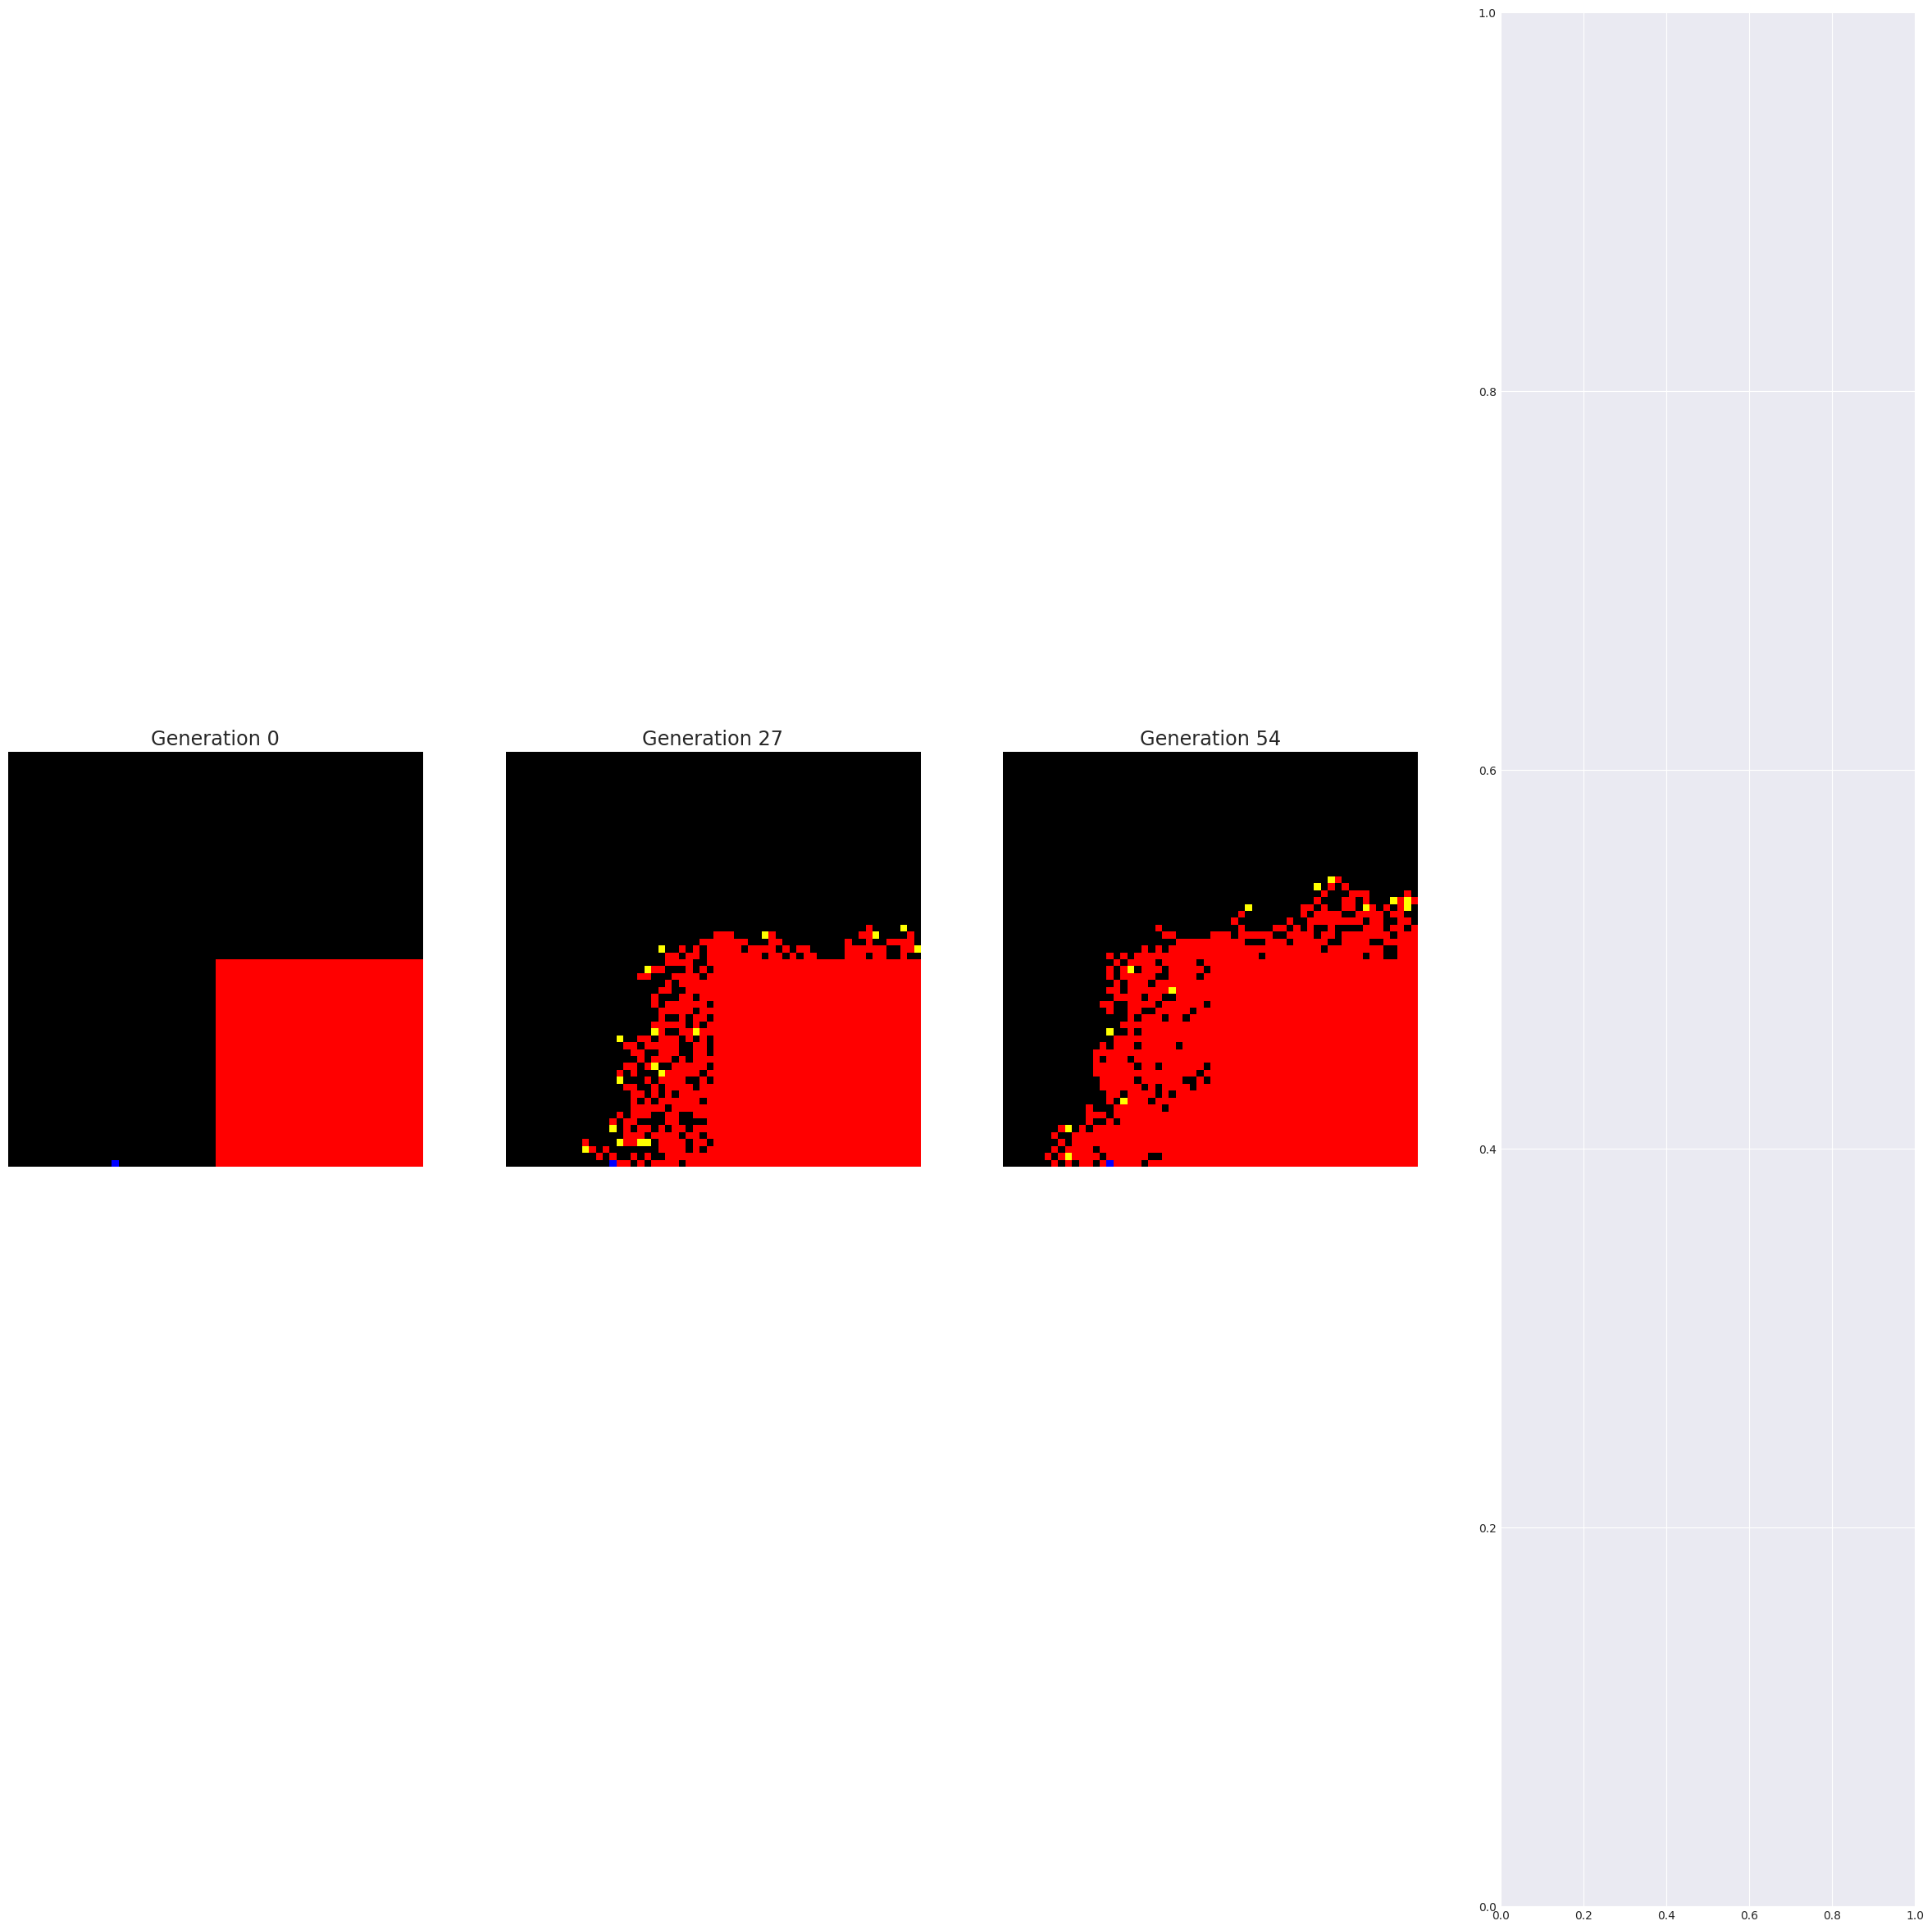

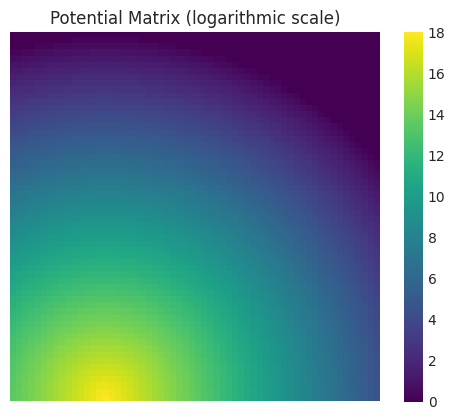

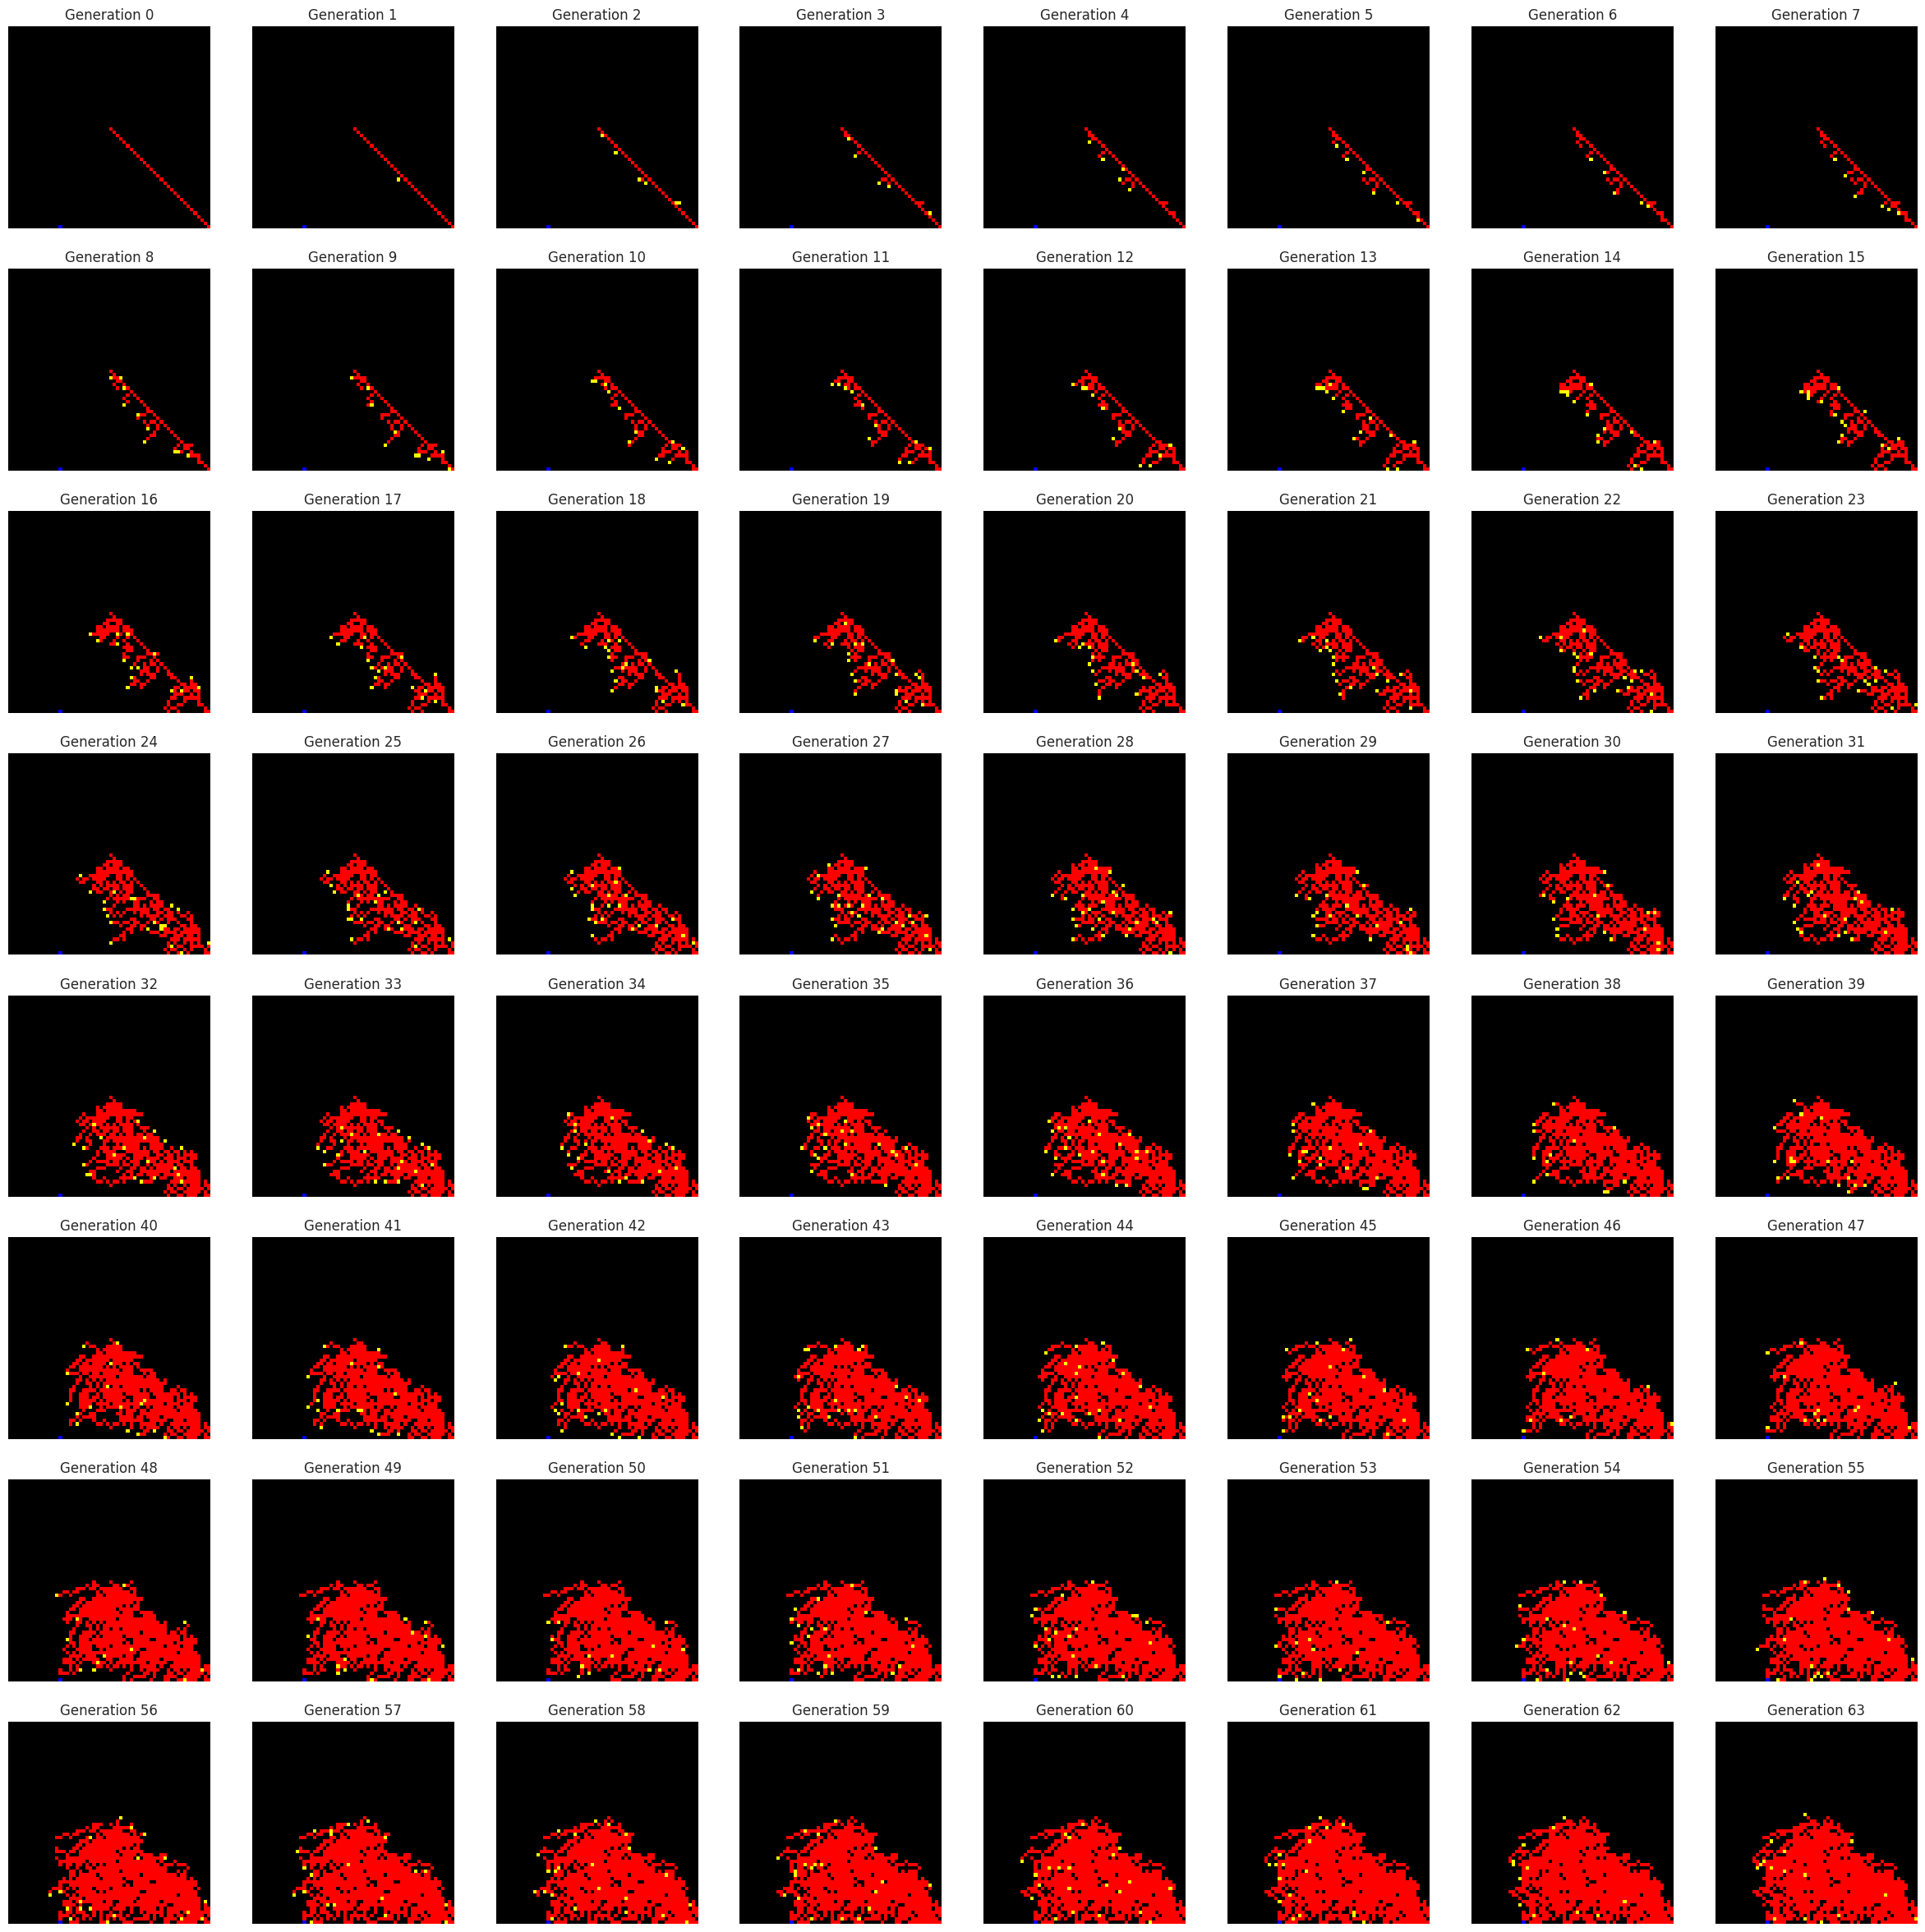

IndexError: list index out of range

In [ ]:
# vis_engine(engine=engine1)
vis_engine(engine=engine3)

In [ ]:
# with open('./pickles/blob1_sprout0.016.pickle', 'wb') as file:
#     dill.dump(engine1, file)